In [ ]:
!pip install -q imbalanced-learn
!pip install -q smogn

In [ ]:
import os
import smogn
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
folder_path = '/content/drive/MyDrive/deeplearning2024_VincenzinaSoos/ex_1'
os.chdir(folder_path)

In [ ]:
train = pd.read_csv('data/urban_bliss_train.csv')
test = pd.read_csv('data/urban_bliss_test.csv')

In [ ]:
df = pd.concat([train, test], keys=['train', 'test']).reset_index(level=0)
df.columns = df.columns.str.lower()

In [ ]:
df.head(5)

,level_0,city,month,year,decibel_level,traffic_density,green_space_area,air_quality_index,happiness_score,cost_of_living_index,healthcare_index
0,train,New York,January,2024,70,High,35,40,6.5,100,80
1,train,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,train,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,train,London,January,2024,55,High,50,60,7.2,110,85
4,train,Paris,January,2024,60,High,45,65,6.9,95,80


Happiness Score Summary:
count    596.000000
mean     -40.434228
std       43.064520
min     -122.900000
25%      -78.275000
50%      -33.650000
75%        4.200000
max        8.700000
Name: happiness_score, dtype: float64


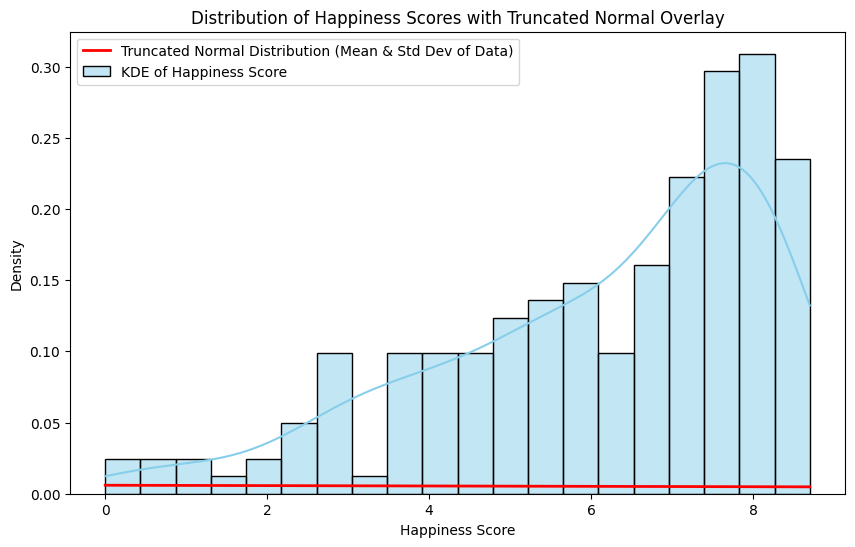

In [ ]:
# Check summary statistics of happiness_score
print("Happiness Score Summary:")
print(df['happiness_score'].describe())

# Re-plot with truncation at 0 if necessary
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

happiness_scores = df['happiness_score']

# Calculate mean and std deviation for happiness_score
mean, std_dev = np.mean(happiness_scores), np.std(happiness_scores)

# Limit x-axis to non-negative values only if that's appropriate for your data
x_values = np.linspace(0, max(happiness_scores), 100)
normal_dist_curve = norm.pdf(x_values, mean, std_dev)

# Plot histogram and KDE with truncation if needed
plt.figure(figsize=(10, 6))
sns.histplot(happiness_scores[happiness_scores >= 0], bins=20, kde=True, color='skyblue', edgecolor='black', stat="density", label="KDE of Happiness Score")

# Overlay the truncated normal distribution curve
plt.plot(x_values, normal_dist_curve, 'r-', linewidth=2, label='Truncated Normal Distribution (Mean & Std Dev of Data)')

# Add labels and legend
plt.title('Distribution of Happiness Scores with Truncated Normal Overlay')
plt.xlabel('Happiness Score')
plt.ylabel('Density')
plt.legend()
plt.show()


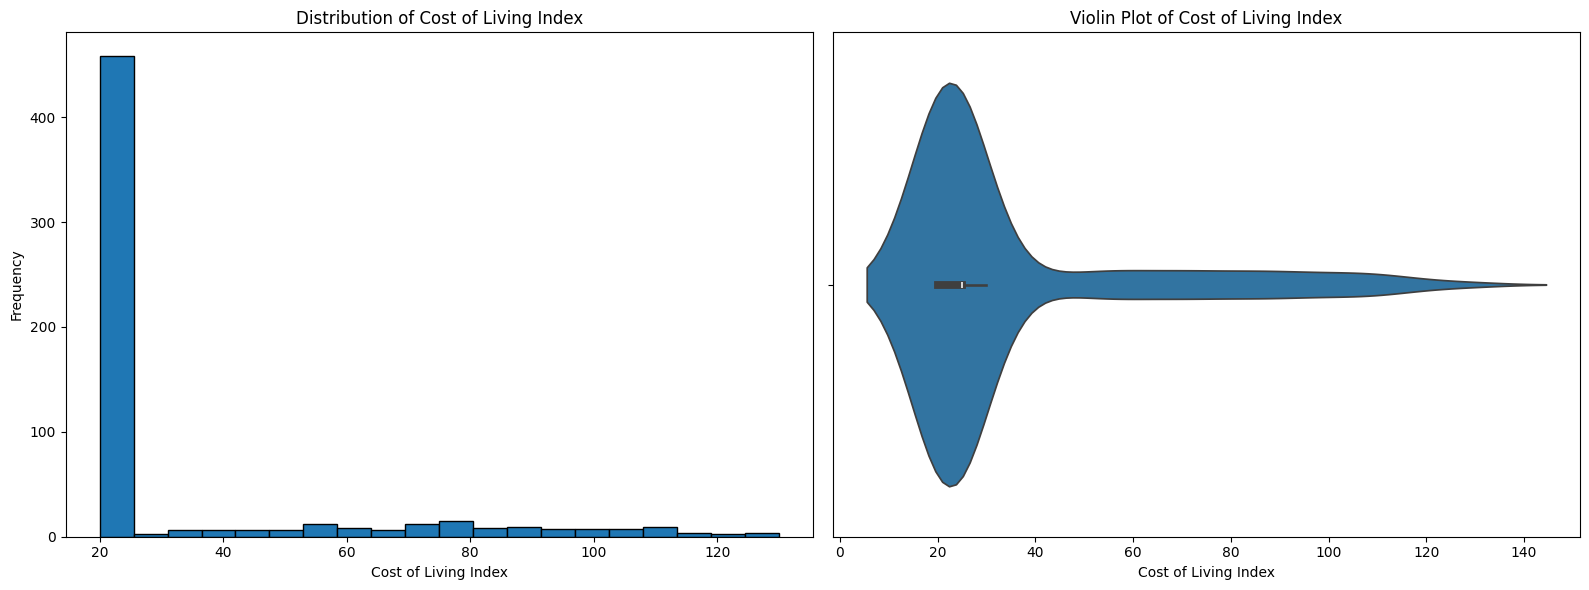

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(df['cost_of_living_index'], bins=20, edgecolor='k')
axes[0].set_title("Distribution of Cost of Living Index")
axes[0].set_xlabel("Cost of Living Index")
axes[0].set_ylabel("Frequency")

sns.violinplot(x=df['cost_of_living_index'], ax=axes[1])
axes[1].set_title("Violin Plot of Cost of Living Index")
axes[1].set_xlabel("Cost of Living Index")

plt.tight_layout()
plt.show()

# encoding

In [ ]:
# One-Hot Encode 'level_0' and 'city'
df_encoded = pd.get_dummies(df, columns=['city'])
df_encoded.drop(columns=['level_0'], inplace=True)

In [ ]:
df_encoded.head(5)

,month,year,decibel_level,traffic_density,green_space_area,air_quality_index,happiness_score,cost_of_living_index,healthcare_index,city_Adelaide,...,city_Whangaruru,city_Whataroa,city_Whitianga,city_Xalapa,city_Xiamen,city_Yangon,city_Yellowknife,city_Yerevan,city_Zagreb,city_Zurich
0,January,2024,70,High,35,40,6.5,100,80,False,...,False,False,False,False,False,False,False,False,False,False
1,January,2024,65,Medium,40,50,6.8,90,75,False,...,False,False,False,False,False,False,False,False,False,False
2,January,2024,60,Medium,30,55,7.0,85,70,False,...,False,False,False,False,False,False,False,False,False,False
3,January,2024,55,High,50,60,7.2,110,85,False,...,False,False,False,False,False,False,False,False,False,False
4,January,2024,60,High,45,65,6.9,95,80,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Label Encode 'month' and 'traffic_density'
label_encoder = LabelEncoder()
df_encoded['month'] = label_encoder.fit_transform(df_encoded['month'])
df_encoded['traffic_density'] = label_encoder.fit_transform(df_encoded['traffic_density'])

In [ ]:
df_encoded.head(5)

,month,year,decibel_level,traffic_density,green_space_area,air_quality_index,happiness_score,cost_of_living_index,healthcare_index,city_Adelaide,...,city_Whangaruru,city_Whataroa,city_Whitianga,city_Xalapa,city_Xiamen,city_Yangon,city_Yellowknife,city_Yerevan,city_Zagreb,city_Zurich
0,4,2024,70,0,35,40,6.5,100,80,False,...,False,False,False,False,False,False,False,False,False,False
1,4,2024,65,2,40,50,6.8,90,75,False,...,False,False,False,False,False,False,False,False,False,False
2,4,2024,60,2,30,55,7.0,85,70,False,...,False,False,False,False,False,False,False,False,False,False
3,4,2024,55,0,50,60,7.2,110,85,False,...,False,False,False,False,False,False,False,False,False,False
4,4,2024,60,0,45,65,6.9,95,80,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include=['bool']).columns})

In [ ]:
df_encoded.head(5)

,month,year,decibel_level,traffic_density,green_space_area,air_quality_index,happiness_score,cost_of_living_index,healthcare_index,city_Adelaide,...,city_Whangaruru,city_Whataroa,city_Whitianga,city_Xalapa,city_Xiamen,city_Yangon,city_Yellowknife,city_Yerevan,city_Zagreb,city_Zurich
0,4,2024,70,0,35,40,6.5,100,80,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2024,65,2,40,50,6.8,90,75,0,...,0,0,0,0,0,0,0,0,0,0
2,4,2024,60,2,30,55,7.0,85,70,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2024,55,0,50,60,7.2,110,85,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2024,60,0,45,65,6.9,95,80,0,...,0,0,0,0,0,0,0,0,0,0


# sampling


# balance

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

In [ ]:
df_encoded['cost_of_living_index'] = pd.to_numeric(df_encoded['cost_of_living_index'], errors='coerce')

In [ ]:
print(df_encoded['cost_of_living_index'].describe())
print(df_encoded['cost_of_living_index'].value_counts())

count    596.000000
mean      35.025168
std       26.043745
min       20.000000
25%       20.000000
50%       25.000000
75%       25.000000
max      130.000000
Name: cost_of_living_index, dtype: float64
cost_of_living_index
25     230
20     228
55      12
70      12
90       9
110      9
80       9
85       8
60       8
100      7
105      7
95       7
75       6
50       6
45       6
40       6
35       6
65       6
115      4
120      3
130      3
30       3
125      1
Name: count, dtype: int64


In [ ]:
# Step 1: Separate Lower and Higher Cost of Living Index Values
threshold = 40  # Set threshold for higher values to focus clustering on sparse range above this threshold
lower_values = df_encoded[df_encoded['cost_of_living_index'] <= threshold]
higher_values = df_encoded[df_encoded['cost_of_living_index'] > threshold]

In [ ]:
# Step 2: Apply Clustering Only to Higher Values
num_clusters = 10  # Define the number of clusters for the sparse, higher cost values
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(higher_values.drop(columns=['cost_of_living_index']))

KMeans(n_clusters=10, random_state=42)

In [ ]:
# Step 3: Find Medoids for Each Cluster in Higher Values
medoids = []
for i in range(num_clusters):
    cluster_points = higher_values[kmeans.labels_ == i]  # Points in each cluster
    centroid = kmeans.cluster_centers_[i]  # Cluster centroid

    # Calculate distances from centroid to each point in the cluster
    distances = cdist([centroid], cluster_points.drop(columns=['cost_of_living_index']), metric='euclidean')

    # Select the medoid (closest point to the centroid)
    medoid_index = np.argmin(distances)
    medoids.append(cluster_points.iloc[medoid_index])

In [ ]:
# Convert medoids list to DataFrame
medoids_df = pd.DataFrame(medoids)

In [ ]:
# Step 4: Combine Lower Values and Medoids of Higher Values
balanced_df = pd.concat([lower_values, medoids_df], ignore_index=True)

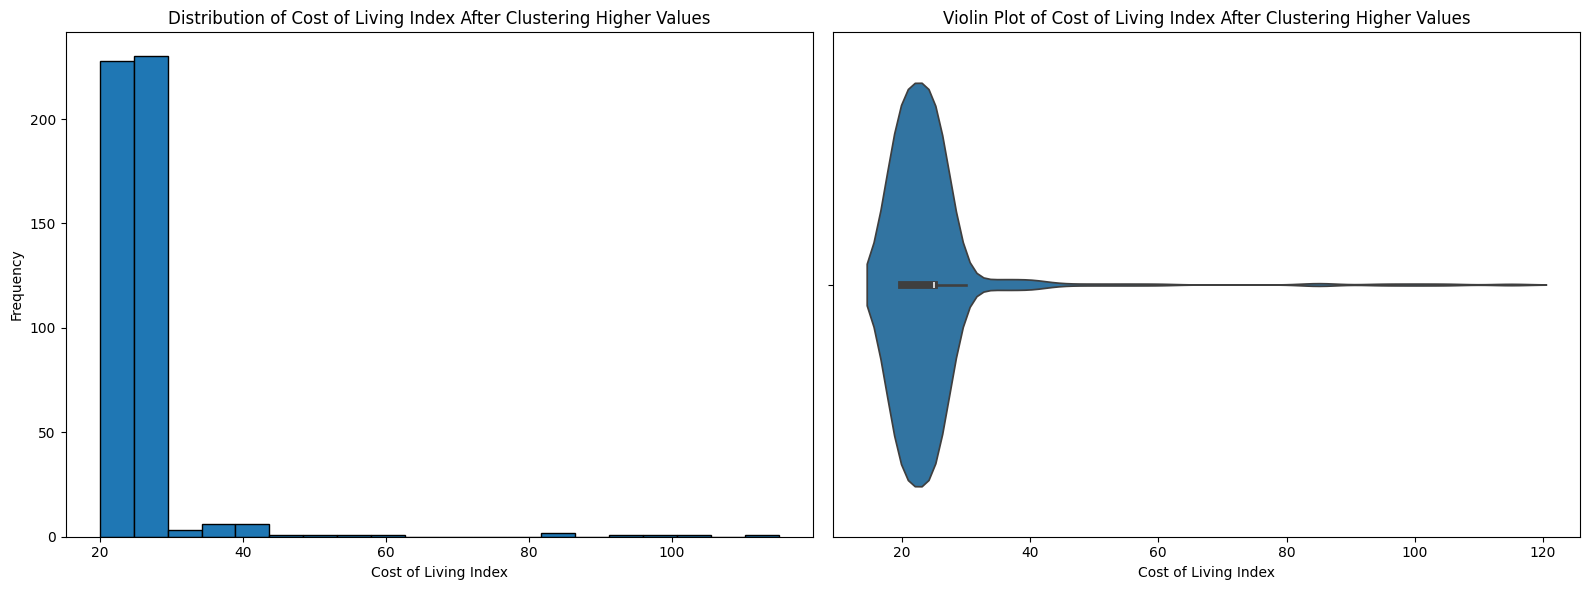

count    483.000000
mean      24.109731
std        9.414078
min       20.000000
25%       20.000000
50%       25.000000
75%       25.000000
max      115.000000
Name: cost_of_living_index, dtype: float64


,month,year,decibel_level,traffic_density,green_space_area,air_quality_index,happiness_score,cost_of_living_index,healthcare_index,city_Adelaide,...,city_Whangaruru,city_Whataroa,city_Whitianga,city_Xalapa,city_Xiamen,city_Yangon,city_Yellowknife,city_Yerevan,city_Zagreb,city_Zurich
0,6.0,2024.0,80.0,3.0,15.0,155.0,4.0,40.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,2024.0,85.0,3.0,10.0,190.0,3.0,40.0,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,2024.0,90.0,3.0,5.0,195.0,2.5,35.0,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,2024.0,80.0,3.0,20.0,205.0,3.5,40.0,55.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2024.0,75.0,0.0,25.0,210.0,4.5,35.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Distribution plot after clustering higher values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(balanced_df['cost_of_living_index'], bins=20, edgecolor='k')
axes[0].set_title("Distribution of Cost of Living Index After Clustering Higher Values")
axes[0].set_xlabel("Cost of Living Index")
axes[0].set_ylabel("Frequency")

sns.violinplot(x=balanced_df['cost_of_living_index'], ax=axes[1])
axes[1].set_title("Violin Plot of Cost of Living Index After Clustering Higher Values")
axes[1].set_xlabel("Cost of Living Index")

plt.tight_layout()
plt.show()

# Check the summary of balanced_df
print(balanced_df['cost_of_living_index'].describe())
balanced_df.head()

r_index: 100%|##########| 21/21 [00:00<00:00, 122.62it/s]
/usr/local/lib/python3.10/dist-packages/smogn/over_sampling.py:446: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_new.insert(
/usr/local/lib/python3.10/dist-packages/smogn/over_sampling.py:446: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_new.insert(
/usr/local/lib/python3.10/dist-packages/smogn/over_sampling.py:446: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

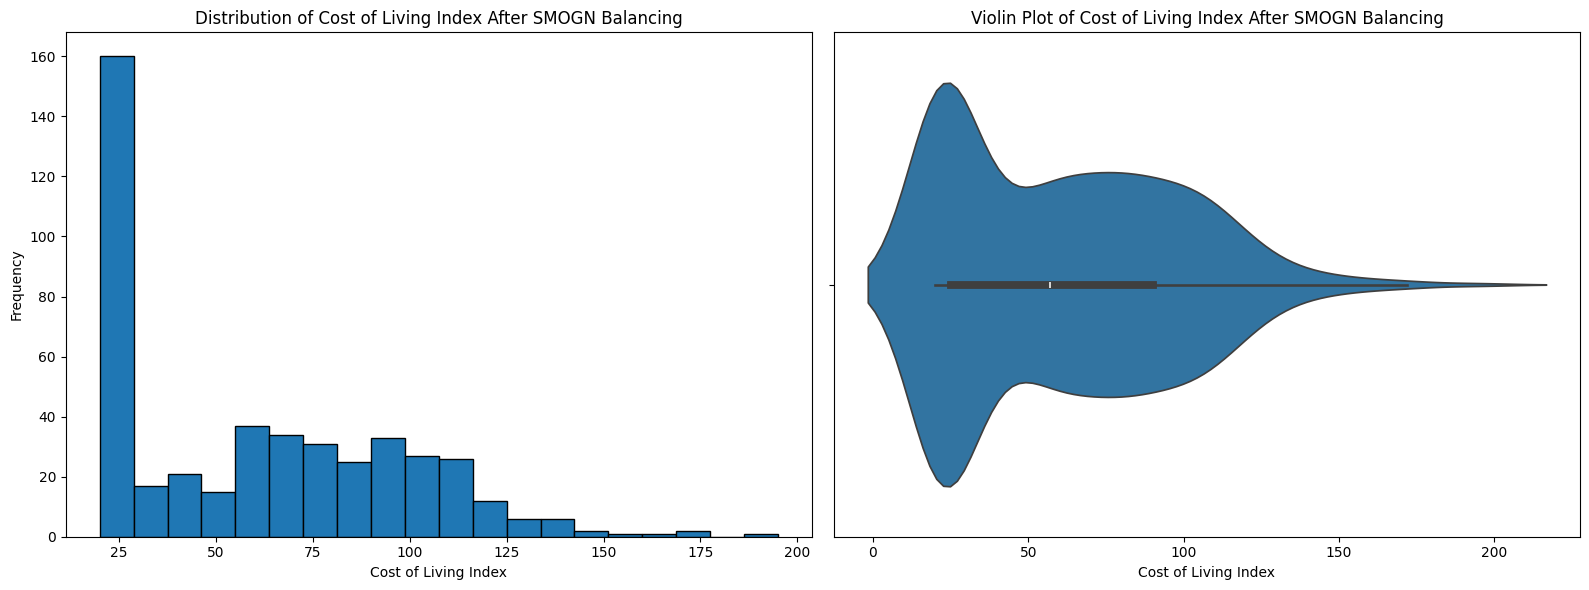

In [ ]:
import smogn

# Apply SMOGN to create a more balanced dataset
df_balanced_smogn = smogn.smoter(
    data=df_encoded,
    y='cost_of_living_index',  # Target variable
    k=5,                       # Number of nearest neighbors
    samp_method='balance',     # Balancing method
    rel_thres=0.9,             # Relevance threshold to identify minority samples
    pert=0.02                  # Lower perturbation value to avoid NaNs
)

# Plot the distribution after SMOGN balancing
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(df_balanced_smogn['cost_of_living_index'], bins=20, edgecolor='k')
axes[0].set_title("Distribution of Cost of Living Index After SMOGN Balancing")
axes[0].set_xlabel("Cost of Living Index")
axes[0].set_ylabel("Frequency")

sns.violinplot(x=df_balanced_smogn['cost_of_living_index'], ax=axes[1])
axes[1].set_title("Violin Plot of Cost of Living Index After SMOGN Balancing")
axes[1].set_xlabel("Cost of Living Index")

plt.tight_layout()
plt.show()


# train / test split

In [ ]:
X = df_balanced_smogn.drop(columns=['cost_of_living_index'])
y = df_balanced_smogn['cost_of_living_index']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70/30 split

In [ ]:
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (319, 260) (319,)
Test set size: (138, 260) (138,)


# model

In [ ]:
!pip install -q tensorflow

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
input_dim = X_train_scaled.shape[1]
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(input_dim,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))  # Another dropout layer

# Output layer (one node for regression output)
model.add(tf.keras.layers.Dense(1, activation='linear'))  # Linear activation for regression

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 64)                  │          16,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,345 (130.25 KB)

 Trainable params: 33,345 (130.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 5237.6641 - mae: 61.3069 - val_loss: 4605.9658 - val_mae: 58.1537
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4706.9785 - mae: 56.8546 - val_loss: 4267.3975 - val_mae: 54.8085
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4211.3193 - mae: 52.2947 - val_loss: 3574.1360 - val_mae: 47.8024
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3339.8708 - mae: 43.5718 - val_loss: 2380.5684 - val_mae: 38.1286
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1851.1982 - mae: 32.0918 - val_loss: 1256.2197 - val_mae: 29.3264
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1158.2690 - mae: 27.1920 - val_loss: 913.6415 - val_mae: 25.0636
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1069.9816 - mae: 25.3232 - val_loss: 806.9415 - val_mae: 22.1167
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 851.2962 - mae: 21.5635 - val_loss: 678.2631 - val_mae: 19.9

In [ ]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Test Mean Absolute Error:", mae)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 751.0732 - mae: 19.8040 
Test Mean Absolute Error: 19.89607048034668


In [ ]:
y_pred = model.predict(X_test_scaled).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


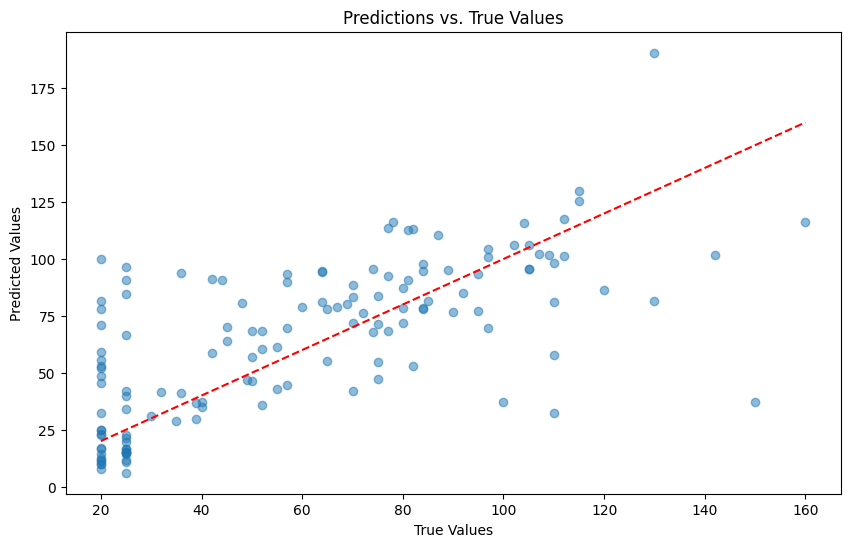

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title("Predictions vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

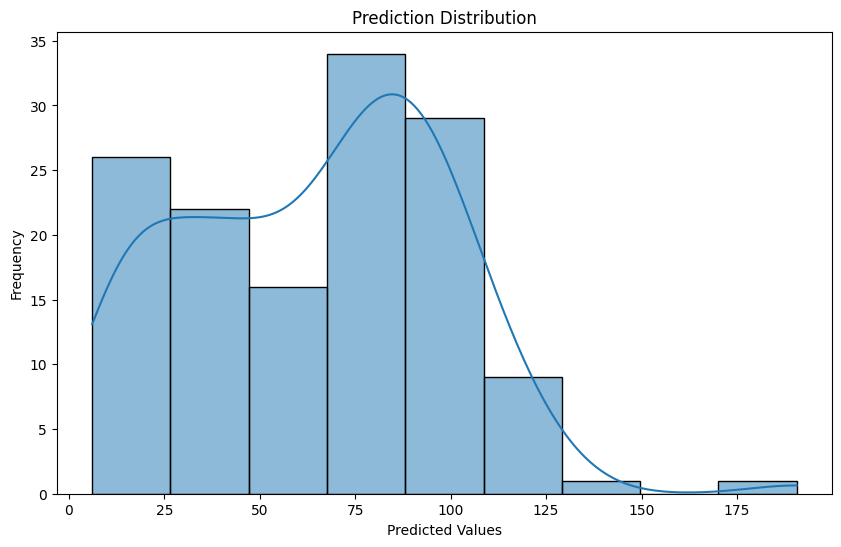

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True)
plt.title("Prediction Distribution")
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.show()

# error metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np

# Generate predictions
y_pred = model.predict(X_test_scaled).flatten()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r_squared}")
print(f"Explained Variance Score: {explained_variance}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Absolute Error (MAE): 19.89607042506121
Mean Squared Error (MSE): 777.6563309196049
Root Mean Squared Error (RMSE): 27.886490114742028
R-squared: 0.3503523627217312
Explained Variance Score: 0.3692557848798057


# imaginery numbers

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()
correlation_target = correlation_matrix['cost_of_living_index'].sort_values(ascending=False)

# Display the correlation values for the target variable
print(correlation_target)

cost_of_living_index    1.000000
happiness_score         0.529709
decibel_level           0.333471
air_quality_index       0.312448
city_Tokyo              0.189484
                          ...   
city_Greymouth         -0.075186
month                  -0.134015
traffic_density        -0.180681
healthcare_index       -0.356185
green_space_area       -0.583372
Name: cost_of_living_index, Length: 261, dtype: float64


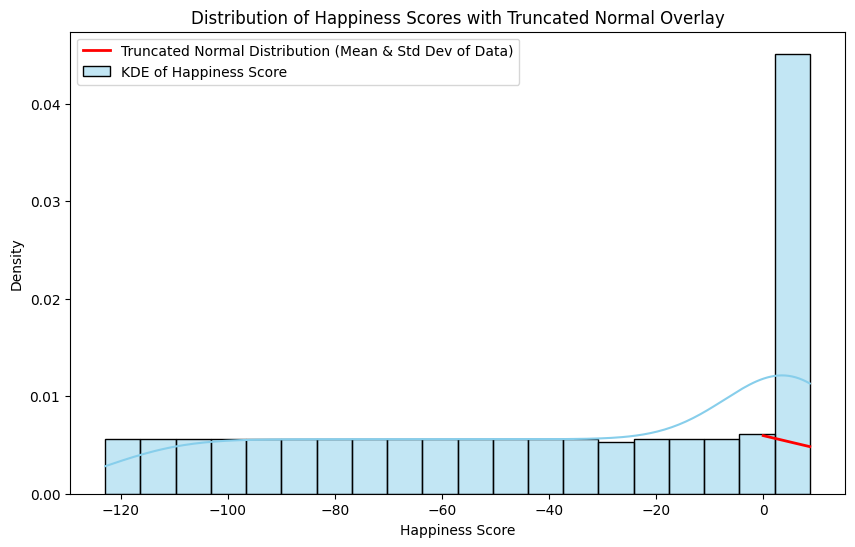

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Assuming df is your DataFrame with the column 'happiness_score'
happiness_scores = df['happiness_score']

# Calculate mean and standard deviation
mean, std_dev = np.mean(happiness_scores), np.std(happiness_scores)

# Set up values for the normal distribution curve, avoiding negatives
x_values = np.linspace(0, max(happiness_scores), 100)
normal_dist_curve = norm.pdf(x_values, mean, std_dev)

# Plot KDE for actual happiness scores
plt.figure(figsize=(10, 6))
sns.histplot(happiness_scores, bins=20, kde=True, color='skyblue', edgecolor='black', stat="density", label="KDE of Happiness Score")

# Overlay the truncated normal distribution curve
plt.plot(x_values, normal_dist_curve, 'r-', linewidth=2, label='Truncated Normal Distribution (Mean & Std Dev of Data)')

# Add labels and legend
plt.title('Distribution of Happiness Scores with Truncated Normal Overlay')
plt.xlabel('Happiness Score')
plt.ylabel('Density')
plt.legend()
plt.show()



In [ ]:
# Define imaginary data focusing on the most correlated features
imaginary_data = pd.DataFrame({
    'happiness_score': [9, 5, 2],            # High, medium, low values
    'decibel_level': [80, 60, 30],           # High noise, medium noise, low noise
    'air_quality_index': [90, 50, 20],       # High pollution, medium, low pollution
    'green_space_area': [10, 30, 50],        # High, medium, and low green space areas
})

# Identify columns that are missing in imaginary_data
missing_cols = [col for col in X.columns if col not in imaginary_data.columns]

# Create a DataFrame with mean values for these missing columns
mean_values = pd.DataFrame({col: [X[col].mean()] * imaginary_data.shape[0] for col in missing_cols})

# Concatenate imaginary_data with the mean values DataFrame along the columns
imaginary_data_full = pd.concat([imaginary_data.reset_index(drop=True), mean_values.reset_index(drop=True)], axis=1)

# Ensure the final DataFrame has the columns in the same order as the original X dataset
imaginary_data_full = imaginary_data_full[X.columns]

In [ ]:
# Scale the imaginary test data using the previously fitted scaler
imaginary_data_scaled = scaler.transform(imaginary_data_full)
# Make predictions
predictions = model.predict(imaginary_data_scaled).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


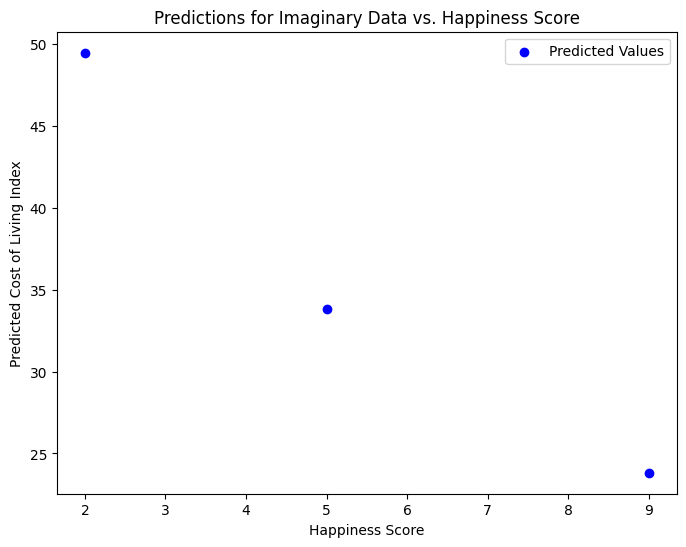

In [ ]:
import matplotlib.pyplot as plt

# Plot predictions against one of the key features for comparison
plt.figure(figsize=(8, 6))
plt.scatter(imaginary_data_full['happiness_score'], predictions, color='blue', label='Predicted Values')
plt.xlabel('Happiness Score')
plt.ylabel('Predicted Cost of Living Index')
plt.title('Predictions for Imaginary Data vs. Happiness Score')
plt.legend()
plt.show()
